In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Leitura e Tratamento dos Dados

In [7]:
# O '\s*;\s*' tira os espaços antes dos campos (o '?' e 'salary-classification' tinham)
training = pd.read_csv("../training.csv", sep = '\s*;\s*', engine = 'python', na_values = '?')
test = pd.read_csv("../test.csv", sep = '\s*;\s*', engine = 'python', na_values = '?')

In [8]:
training.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary-classification
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [9]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   age                    32561 non-null  int64 
 1   workclass              30725 non-null  object
 2   fnlwgt                 32561 non-null  int64 
 3   education              32561 non-null  object
 4   education-num          32561 non-null  int64 
 5   marital-status         32561 non-null  object
 6   occupation             30718 non-null  object
 7   relationship           32561 non-null  object
 8   race                   32561 non-null  object
 9   sex                    32561 non-null  object
 10  capital-gain           32561 non-null  int64 
 11  capital-loss           32561 non-null  int64 
 12  hours-per-week         32561 non-null  int64 
 13  native-country         31978 non-null  object
 14  salary-classification  32561 non-null  object
dtypes: int64(6), object

In [10]:
training.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


#### Vamos observar a percentagem de missing values para cada feature do training e teste

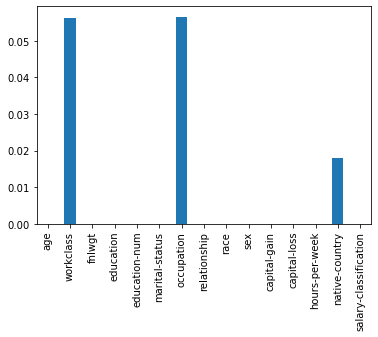

In [11]:
percent_missing = training.isnull().sum() / len(training)
percent_missing.plot(kind = 'bar')
plt.show()

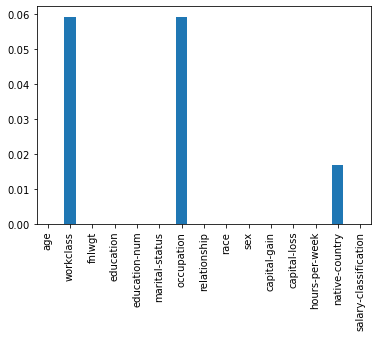

In [12]:
percent_missing = test.isnull().sum() / len(test)
percent_missing.plot(kind = 'bar')
plt.show()

#### Não existem missing values consideráveis para a remoção de features

In [13]:
training[training['workclass'].isna() == True]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary-classification
27,54,NaN,180211,Some-college,10,Married-civ-spouse,NaN,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,NaN,293936,7th-8th,4,Married-spouse-absent,NaN,Not-in-family,White,Male,0,0,40,NaN,<=50K
69,25,NaN,200681,Some-college,10,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,<=50K
77,67,NaN,212759,10th,6,Married-civ-spouse,NaN,Husband,White,Male,0,0,2,United-States,<=50K
106,17,NaN,304873,10th,6,Never-married,NaN,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,NaN,320084,Bachelors,13,Married-civ-spouse,NaN,Wife,White,Female,0,0,55,United-States,>50K
32531,30,NaN,33811,Bachelors,13,Never-married,NaN,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32539,71,NaN,287372,Doctorate,16,Married-civ-spouse,NaN,Husband,White,Male,0,0,10,United-States,>50K
32541,41,NaN,202822,HS-grad,9,Separated,NaN,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [14]:
training['workclass'].fillna(training.mode()['workclass'].iloc[0], inplace = True)
training['occupation'].fillna(training.mode()['occupation'].iloc[0], inplace = True)
training['native-country'].fillna(training.mode()['native-country'].iloc[0], inplace = True)

test['workclass'].fillna(test.mode()['workclass'].iloc[0], inplace = True)
test['occupation'].fillna(test.mode()['occupation'].iloc[0], inplace = True)
test['native-country'].fillna(test.mode()['native-country'].iloc[0], inplace = True)

In [15]:
training[training['workclass'].isna() == True]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary-classification


#### Discretização da feature 'age'

(array([5570., 5890., 6048., 6163., 3967., 2591., 1595.,  496.,  174.,
          67.]),
 array([17. , 24.3, 31.6, 38.9, 46.2, 53.5, 60.8, 68.1, 75.4, 82.7, 90. ]),
 <BarContainer object of 10 artists>)

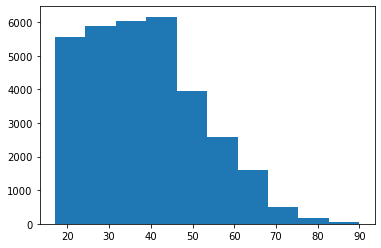

In [16]:
plt.hist(x = training['age'])

In [17]:
training['age'] = pd.qcut(training['age'], q = 4)
training = training.rename(columns = {'age':'ageBinned'})

test['age'] = pd.qcut(test['age'], q = 4)
test = test.rename(columns = {'age':'ageBinned'})

In [18]:
training['ageBinned'] = training['ageBinned'].astype('category').cat.codes
test['ageBinned'] = test['ageBinned'].astype('category').cat.codes

#### Tornar as variáveis nominais em categóricas

In [19]:
training['workclass'] = training['workclass'].astype('category')
training['education'] = training['education'].astype('category')
training['marital-status'] = training['marital-status'].astype('category')
training['occupation'] = training['occupation'].astype('category')
training['relationship'] = training['relationship'].astype('category')
training['race'] = training['race'].astype('category')
training['native-country'] = training['native-country'].astype('category')
training['sex'] = training['sex'].astype('category')
training['salary-classification'] = training['salary-classification'].astype('category')

test['workclass'] = test['workclass'].astype('category')
test['education'] = test['education'].astype('category')
test['marital-status'] = test['marital-status'].astype('category')
test['occupation'] = test['occupation'].astype('category')
test['relationship'] = test['relationship'].astype('category')
test['race'] = test['race'].astype('category')
test['native-country'] = test['native-country'].astype('category')
test['sex'] = test['sex'].astype('category')
test['salary-classification'] = test['salary-classification'].astype('category')

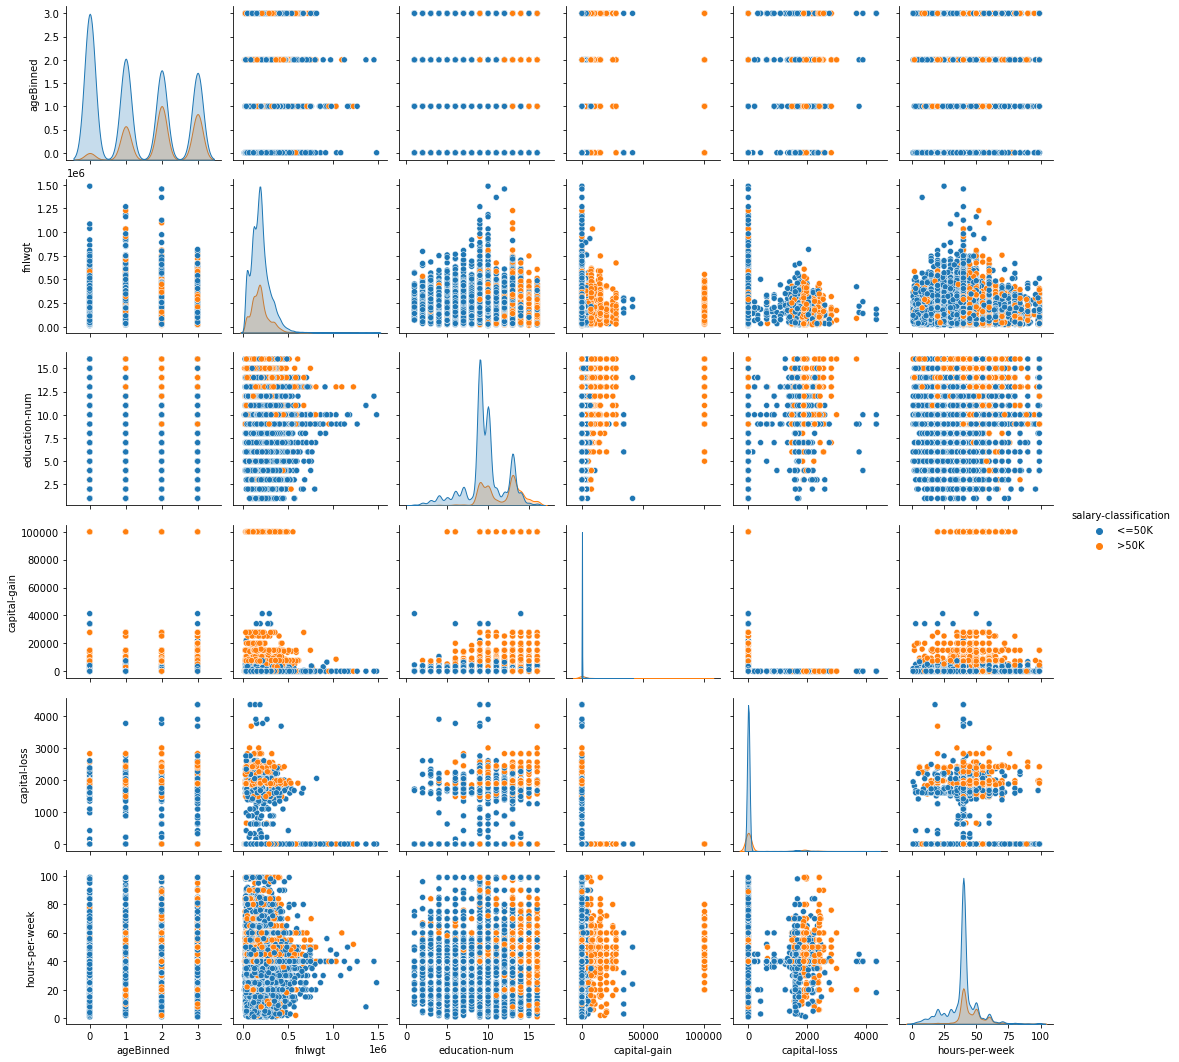

In [20]:
sns.pairplot(training, hue = 'salary-classification')

#### Capital gain e capital loss com pouca dispersão de dados

#### Vamos agregar estas duas features

In [21]:
training['capital-loss']

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    0
32558    0
32559    0
32560    0
Name: capital-loss, Length: 32561, dtype: int64

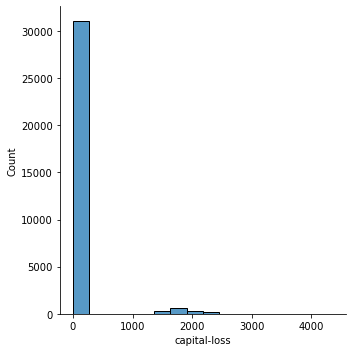

In [22]:
sns.displot(training, x = 'capital-loss')

In [23]:
training['capital'] = training['capital-gain'] - training['capital-loss']
test['capital'] = test['capital-gain'] - test['capital-loss']

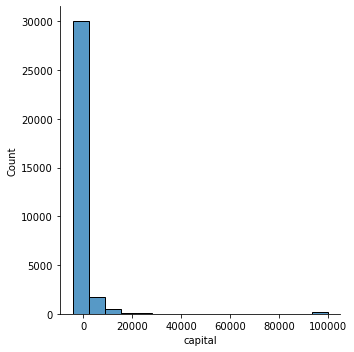

In [24]:
sns.displot(training, x = 'capital')

In [25]:
training = training.drop(columns = ['capital-loss', 'capital-gain'])
test = test.drop(columns = ['capital-loss', 'capital-gain'])

In [26]:
# Configurar a ordem do dataset
training = training[['ageBinned', 'workclass', 'fnlwgt', 'education', 'education-num',
                     'marital-status', 'occupation', 'relationship', 'race', 'sex',
                     'hours-per-week', 'native-country', 'capital', 'salary-classification']]
test = test[['ageBinned', 'workclass', 'fnlwgt', 'education', 'education-num',
                     'marital-status', 'occupation', 'relationship', 'race', 'sex',
                     'hours-per-week', 'native-country', 'capital', 'salary-classification']]

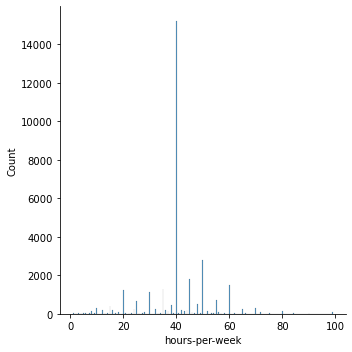

In [27]:
sns.displot(training, x = 'hours-per-week')

<AxesSubplot:xlabel='count', ylabel='education'>

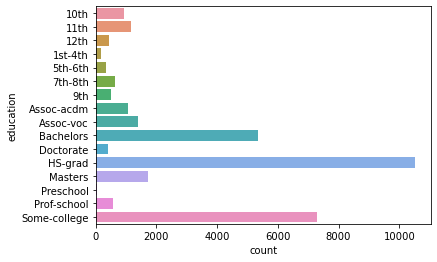

In [28]:
sns.countplot(y = 'education', data = training)

<AxesSubplot:xlabel='count', ylabel='race'>

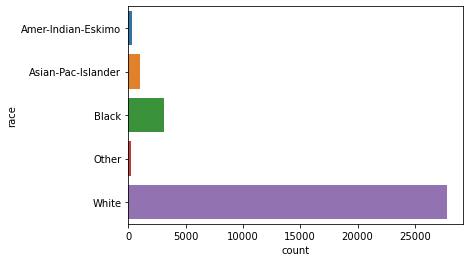

In [29]:
sns.countplot(y = 'race', data = training)

<AxesSubplot:xlabel='count', ylabel='marital-status'>

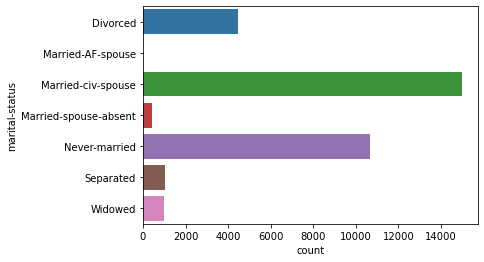

In [30]:
sns.countplot(y = 'marital-status', data = training)

<AxesSubplot:xlabel='count', ylabel='occupation'>

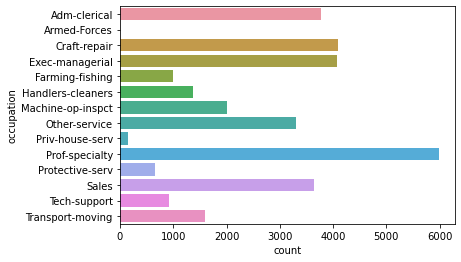

In [31]:
sns.countplot(y = 'occupation', data = training)

<AxesSubplot:xlabel='count', ylabel='relationship'>

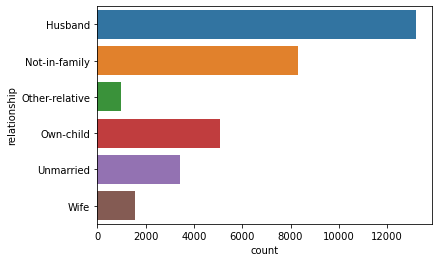

In [32]:
sns.countplot(y = 'relationship', data = training)

<AxesSubplot:xlabel='sex', ylabel='count'>

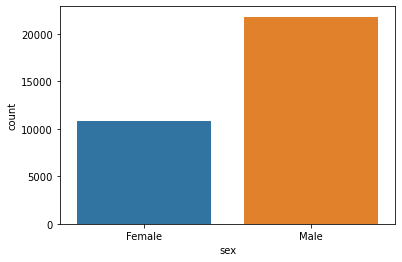

In [33]:
sns.countplot(x = 'sex', data = training)

<AxesSubplot:xlabel='count', ylabel='workclass'>

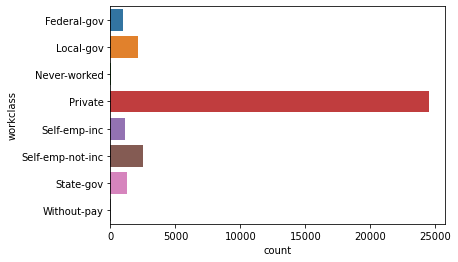

In [34]:
sns.countplot(y = 'workclass', data = training)

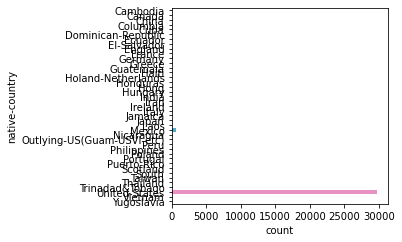

In [35]:
sns.countplot(y = 'native-country', data = training)
plt.gcf().subplots_adjust(bottom=0.20)
plt.gcf().subplots_adjust(left=0.40)
plt.savefig('na.pdf', format = 'pdf')

## Transformação dos atributos nominais em numéricos
#### Através da atribuição de códigos a diferentes valores

In [36]:
trainingNBGaussian = training.copy()
testNBGaussian = test.copy()

In [37]:
trainingNBGaussian['education'] = trainingNBGaussian['education'].astype('category').cat.codes
trainingNBGaussian['occupation'] = trainingNBGaussian['occupation'].astype('category').cat.codes
trainingNBGaussian['relationship'] = trainingNBGaussian['relationship'].astype('category').cat.codes
trainingNBGaussian['workclass'] = trainingNBGaussian['workclass'].astype('category').cat.codes
trainingNBGaussian['sex'] = trainingNBGaussian['sex'].astype('category').cat.codes
trainingNBGaussian['native-country'] = trainingNBGaussian['native-country'].astype('category').cat.codes
trainingNBGaussian['race'] = trainingNBGaussian['race'].astype('category').cat.codes
trainingNBGaussian['salary-classification'] = trainingNBGaussian['salary-classification'].astype('category').cat.codes
trainingNBGaussian['marital-status'] = trainingNBGaussian['marital-status'].astype('category').cat.codes

testNBGaussian['education'] = testNBGaussian['education'].astype('category').cat.codes
testNBGaussian['occupation'] = testNBGaussian['occupation'].astype('category').cat.codes
testNBGaussian['relationship'] = testNBGaussian['relationship'].astype('category').cat.codes
testNBGaussian['workclass'] = testNBGaussian['workclass'].astype('category').cat.codes
testNBGaussian['sex'] = testNBGaussian['sex'].astype('category').cat.codes
testNBGaussian['native-country'] = testNBGaussian['native-country'].astype('category').cat.codes
testNBGaussian['race'] = testNBGaussian['race'].astype('category').cat.codes
testNBGaussian['salary-classification'] = testNBGaussian['salary-classification'].astype('category').cat.codes
testNBGaussian['marital-status'] = testNBGaussian['marital-status'].astype('category').cat.codes

trainingNBGaussian.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   ageBinned              32561 non-null  int8 
 1   workclass              32561 non-null  int8 
 2   fnlwgt                 32561 non-null  int64
 3   education              32561 non-null  int8 
 4   education-num          32561 non-null  int64
 5   marital-status         32561 non-null  int8 
 6   occupation             32561 non-null  int8 
 7   relationship           32561 non-null  int8 
 8   race                   32561 non-null  int8 
 9   sex                    32561 non-null  int8 
 10  hours-per-week         32561 non-null  int64
 11  native-country         32561 non-null  int8 
 12  capital                32561 non-null  int64
 13  salary-classification  32561 non-null  int8 
dtypes: int64(4), int8(10)
memory usage: 1.3 MB


#### Visualização dos dados através de um PCA para a redução a duas dimensões

In [38]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(trainingNBGaussian)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [39]:
finalDf = pd.concat([principalDf, trainingNBGaussian[['salary-classification']]], axis = 1)

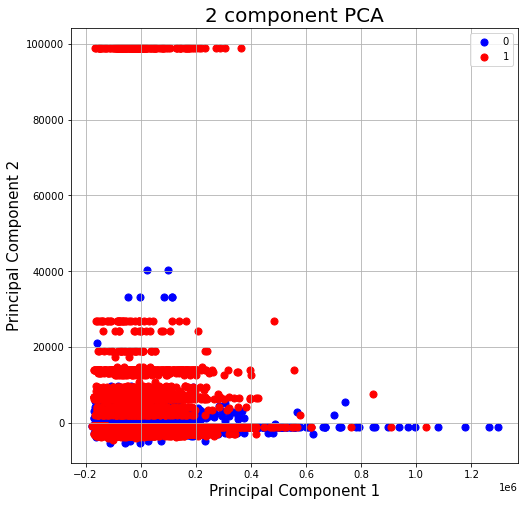

In [40]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['b', 'r']

for target, color in zip(targets, colors):
    indicesToKeep = finalDf['salary-classification'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
               finalDf.loc[indicesToKeep, 'principal component 2'],
               c = color,
               s = 50)
ax.legend(targets)
ax.grid()
plt.savefig('na.pdf', format = 'pdf')

## Correlação das features
#### Através de spearman

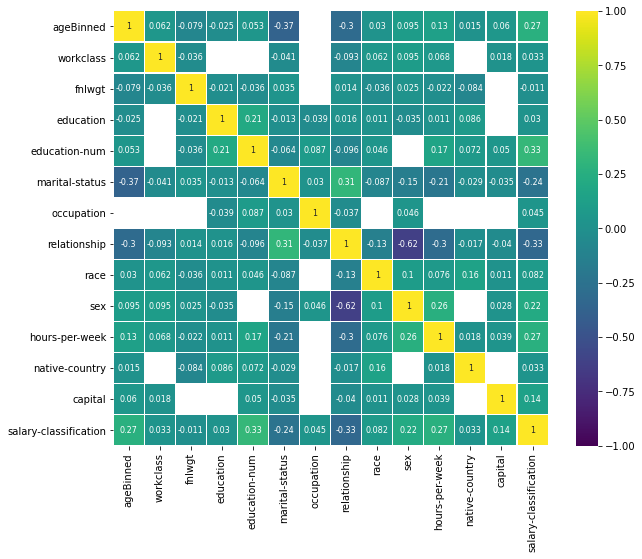

In [41]:
corr = trainingNBGaussian.corr("spearman")
plt.figure(figsize = (10,8))
sns_plot = sns.heatmap(corr[(corr >= 0.01) | (corr <= -0.01)], 
                       cmap = 'viridis', vmax = 1, vmin = -1.0, linewidths = 0.1, annot = True, annot_kws = {"size":8}, square = True)

## Remover features sem valor adicional

#### Após a análise de correlação e da distribuição das variáveis categóricas, notamos que as seguintes features podem ser removidas:

In [42]:
# Visto que já possuimos a variável 'education-num' que dá exatamente a mesma informação
trainingNBGaussian = trainingNBGaussian.drop(columns = ['education'])
# Devido à baixa dispersão dos dados, pelo que tem baixo valor informativo
trainingNBGaussian = trainingNBGaussian.drop(columns = ['native-country'])

trainingNBGaussian = trainingNBGaussian.drop(columns = ['fnlwgt'])
trainingNBGaussian = trainingNBGaussian.drop(columns = ['race'])

testNBGaussian = testNBGaussian.drop(columns = ['education'])
testNBGaussian = testNBGaussian.drop(columns = ['native-country'])

testNBGaussian = testNBGaussian.drop(columns = ['fnlwgt'])
testNBGaussian = testNBGaussian.drop(columns = ['race'])

trainingNBGaussian

,ageBinned,workclass,education-num,marital-status,occupation,relationship,sex,hours-per-week,capital,salary-classification
0,2,6,13,4,0,1,1,40,2174,0
1,3,5,13,2,3,0,1,13,0,0
2,2,3,9,0,5,1,1,40,0,0
3,3,3,7,2,5,0,1,40,0,0
4,0,3,13,2,9,5,0,40,0,0
...,...,...,...,...,...,...,...,...,...,...
32556,0,3,12,2,12,5,0,38,0,0
32557,2,3,9,2,6,0,1,40,0,1
32558,3,3,9,6,0,4,0,40,0,0
32559,0,3,9,4,0,3,1,20,0,0


In [43]:
trainingNBGaussian.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   ageBinned              32561 non-null  int8 
 1   workclass              32561 non-null  int8 
 2   education-num          32561 non-null  int64
 3   marital-status         32561 non-null  int8 
 4   occupation             32561 non-null  int8 
 5   relationship           32561 non-null  int8 
 6   sex                    32561 non-null  int8 
 7   hours-per-week         32561 non-null  int64
 8   capital                32561 non-null  int64
 9   salary-classification  32561 non-null  int8 
dtypes: int64(3), int8(7)
memory usage: 985.9 KB


In [44]:
trainingNBGaussian

,ageBinned,workclass,education-num,marital-status,occupation,relationship,sex,hours-per-week,capital,salary-classification
0,2,6,13,4,0,1,1,40,2174,0
1,3,5,13,2,3,0,1,13,0,0
2,2,3,9,0,5,1,1,40,0,0
3,3,3,7,2,5,0,1,40,0,0
4,0,3,13,2,9,5,0,40,0,0
...,...,...,...,...,...,...,...,...,...,...
32556,0,3,12,2,12,5,0,38,0,0
32557,2,3,9,2,6,0,1,40,0,1
32558,3,3,9,6,0,4,0,40,0,0
32559,0,3,9,4,0,3,1,20,0,0


# Modelos Preditivos

#### Separação das features de treino e teste relativamente ao atributo a prever

In [45]:
train_x = trainingNBGaussian.drop(columns = 'salary-classification')
train_y = trainingNBGaussian['salary-classification']

test_x = testNBGaussian.drop(columns = 'salary-classification')
test_y = testNBGaussian['salary-classification']

In [46]:
trainingNBGaussian.head()

,ageBinned,workclass,education-num,marital-status,occupation,relationship,sex,hours-per-week,capital,salary-classification
0,2,6,13,4,0,1,1,40,2174,0
1,3,5,13,2,3,0,1,13,0,0
2,2,3,9,0,5,1,1,40,0,0
3,3,3,7,2,5,0,1,40,0,0
4,0,3,13,2,9,5,0,40,0,0


## Naive Bayes Gaussiano

In [47]:
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import QuantileTransformer

pipeline = make_pipeline(QuantileTransformer(output_distribution = 'normal'), GaussianNB())
pipeline.fit(train_x, train_y)

Pipeline(steps=[('quantiletransformer',
                 QuantileTransformer(output_distribution='normal')),
                ('gaussiannb', GaussianNB())])

In [48]:
predictions = pipeline.predict(test_x)
predictions

array([0, 0, 0, ..., 1, 0, 1], dtype=int8)

In [49]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(test_y, predictions))
print(classification_report(test_y, predictions, digits = 3))

[[10769  1666]
 [ 1412  2434]]
              precision    recall  f1-score   support

           0      0.884     0.866     0.875     12435
           1      0.594     0.633     0.613      3846

    accuracy                          0.811     16281
   macro avg      0.739     0.749     0.744     16281
weighted avg      0.815     0.811     0.813     16281



## K Nearest Neighbors

In [50]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(train_x, train_y)

KNeighborsClassifier(n_neighbors=1)

In [51]:
predictions = knn.predict(test_x)
predictions

array([0, 1, 1, ..., 1, 0, 0], dtype=int8)

In [52]:
print(confusion_matrix(test_y, predictions))
print('\n')
print(classification_report(test_y, predictions, digits = 3))

[[11011  1424]
 [ 1420  2426]]


              precision    recall  f1-score   support

           0      0.886     0.885     0.886     12435
           1      0.630     0.631     0.630      3846

    accuracy                          0.825     16281
   macro avg      0.758     0.758     0.758     16281
weighted avg      0.825     0.825     0.825     16281



In [53]:
error_rate = []

# Will take some time
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(train_x, train_y)
    pred_i = knn.predict(test_x)
    error_rate.append(np.mean(pred_i != test_y))

Text(50.25, 0.5, 'Error Rate')

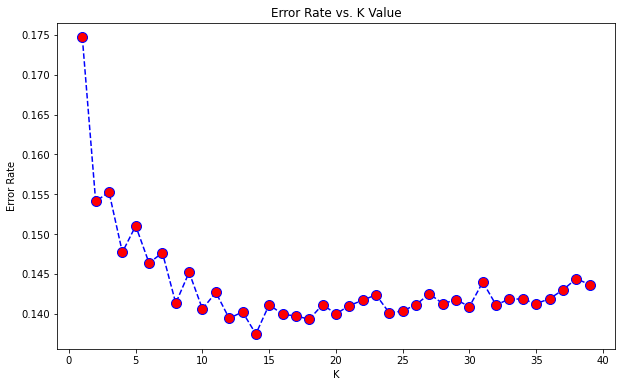

In [54]:
plt.figure(figsize = (10,6))
plt.plot(range(1, 40), error_rate, color = 'blue', linestyle = 'dashed', marker = 'o',
         markerfacecolor = 'red', markersize = 10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.savefig('na.pdf', format = 'pdf')
plt.ylabel('Error Rate')

#### O erro é menor à volta do K = 14
* K = 1

In [55]:
knn = KNeighborsClassifier(n_neighbors = 1)

knn.fit(train_x, train_y)
predictions = knn.predict(test_x)

print('WITH K = 1')
print('\n')
print(confusion_matrix(test_y, predictions))
print('\n')
print(classification_report(test_y, predictions, digits = 3))

WITH K = 1


[[11011  1424]
 [ 1420  2426]]


              precision    recall  f1-score   support

           0      0.886     0.885     0.886     12435
           1      0.630     0.631     0.630      3846

    accuracy                          0.825     16281
   macro avg      0.758     0.758     0.758     16281
weighted avg      0.825     0.825     0.825     16281



* K = 14

In [56]:
knn = KNeighborsClassifier(n_neighbors = 14)

knn.fit(train_x, train_y)
predictions = knn.predict(test_x)

print('WITH K = 14')
print('\n')
print(confusion_matrix(test_y, predictions))
print('\n')
print(classification_report(test_y, predictions, digits = 3))

WITH K = 14


[[11731   704]
 [ 1534  2312]]


              precision    recall  f1-score   support

           0      0.884     0.943     0.913     12435
           1      0.767     0.601     0.674      3846

    accuracy                          0.863     16281
   macro avg      0.825     0.772     0.793     16281
weighted avg      0.857     0.863     0.856     16281



## Random Forest Trees

In [57]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [58]:
parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(6, 10),
    'min_samples_split': range(7, 13),
    'min_samples_leaf': range(3, 5)
}

rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)

tuning = GridSearchCV(rf,
                      parameters,
                      cv = StratifiedKFold(
                          n_splits = 2,
                          random_state = 42,
                          shuffle = True),
                      verbose = 1,
                      n_jobs = 14,
                      scoring = 'accuracy')

tuning.fit(train_x, train_y)

print(tuning.best_params_)
print(tuning.best_score_)

Fitting 2 folds for each of 96 candidates, totalling 192 fits


[Parallel(n_jobs=14)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=14)]: Done  22 tasks      | elapsed:   21.3s
[Parallel(n_jobs=14)]: Done 192 out of 192 | elapsed:  2.6min finished


{'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 3, 'min_samples_split': 10}
0.8580203450850217


In [69]:
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42,
                           criterion = 'gini', max_depth = 9,
                           min_samples_leaf = 3, min_samples_split = 10)
# Train the model on training data
rf.fit(train_x, train_y);

In [70]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_x)# Calculate the absolute errors
print(predictions)

[0 0 0 ... 1 0 1]


In [71]:
print(confusion_matrix(test_y, predictions))
print('\n')
print(classification_report(test_y, predictions, digits = 3))

[[11904   531]
 [ 1788  2058]]


              precision    recall  f1-score   support

           0      0.869     0.957     0.911     12435
           1      0.795     0.535     0.640      3846

    accuracy                          0.858     16281
   macro avg      0.832     0.746     0.775     16281
weighted avg      0.852     0.858     0.847     16281



## Decision Tree

In [62]:
from sklearn.tree import DecisionTreeClassifier

In [63]:
decisionTree = DecisionTreeClassifier(random_state = 42)

parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1, 12),
    'min_samples_split': range(2, 17),
    'min_samples_leaf': range(2, 8)
}

tuning = GridSearchCV(decisionTree, 
                      parameters,
                      cv = StratifiedKFold(
                          n_splits = 10,
                          random_state = 42,
                          shuffle = True),
                      verbose = 1,
                      n_jobs = 14,
                      scoring = 'accuracy')

tuning.fit(train_x, train_y)

Fitting 10 folds for each of 1980 candidates, totalling 19800 fits


[Parallel(n_jobs=14)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=14)]: Done  22 tasks      | elapsed:    0.0s
[Parallel(n_jobs=14)]: Done 900 tasks      | elapsed:    2.2s
[Parallel(n_jobs=14)]: Done 2900 tasks      | elapsed:    7.7s
[Parallel(n_jobs=14)]: Done 5700 tasks      | elapsed:   17.8s
[Parallel(n_jobs=14)]: Done 9300 tasks      | elapsed:   35.3s
[Parallel(n_jobs=14)]: Done 13700 tasks      | elapsed:   48.2s
[Parallel(n_jobs=14)]: Done 18900 tasks      | elapsed:  1.2min
[Parallel(n_jobs=14)]: Done 19800 out of 19800 | elapsed:  1.3min finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=42), n_jobs=14,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 12),
                         'min_samples_leaf': range(2, 8),
                         'min_samples_split': range(2, 17)},
             scoring='accuracy', verbose=1)

In [64]:
print(tuning.best_params_)
print(tuning.best_score_)

{'criterion': 'gini', 'max_depth': 11, 'min_samples_leaf': 6, 'min_samples_split': 2}
0.8587265266494619


In [72]:
decisionTree = DecisionTreeClassifier(random_state = 42, 
                                      criterion = 'gini',
                                      max_depth = 11,
                                      min_samples_split = 6,
                                      min_samples_leaf = 2)

decisionTree.fit(train_x, train_y)

DecisionTreeClassifier(max_depth=11, min_samples_leaf=2, min_samples_split=6,
                       random_state=42)

In [73]:
predictions = decisionTree.predict(test_x)
predictions

array([0, 0, 0, ..., 1, 0, 1], dtype=int8)

In [74]:
print(confusion_matrix(test_y, predictions))
print('\n')
print(classification_report(test_y, predictions, digits = 3))

[[11653   782]
 [ 1603  2243]]


              precision    recall  f1-score   support

           0      0.879     0.937     0.907     12435
           1      0.741     0.583     0.653      3846

    accuracy                          0.854     16281
   macro avg      0.810     0.760     0.780     16281
weighted avg      0.847     0.854     0.847     16281



## Adaboost com Decision Tree
* Diminui a variância e o bias do modelo

In [84]:
from sklearn.ensemble import AdaBoostClassifier

# Create adaboost classifer object
abc = AdaBoostClassifier(random_state = 42)

parameters = {
    'learning_rate': np.arange(1.4, 1.7, 0.02),
    'n_estimators': range(200, 1100, 100)
}

# run grid search
tuning = GridSearchCV(abc,
                      param_grid = parameters,
                      cv = StratifiedKFold(
                          n_splits = 10,
                          random_state = 42,
                          shuffle = True),
                      verbose = 1,
                      n_jobs = 14,
                      scoring = 'accuracy')

tuning.fit(train_x, train_y)


print(tuning.best_params_)
print(tuning.best_score_)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


[Parallel(n_jobs=14)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=14)]: Done  22 tasks      | elapsed:   16.8s
[Parallel(n_jobs=14)]: Done 172 tasks      | elapsed:  3.8min
[Parallel(n_jobs=14)]: Done 422 tasks      | elapsed:  8.8min
[Parallel(n_jobs=14)]: Done 772 tasks      | elapsed: 15.8min
[Parallel(n_jobs=14)]: Done 1222 tasks      | elapsed: 25.1min
[Parallel(n_jobs=14)]: Done 1440 out of 1440 | elapsed: 29.8min finished


{'learning_rate': 1.6, 'n_estimators': 700}
0.8720246092521193


In [85]:
abc = AdaBoostClassifier(n_estimators = 700, learning_rate = 1.6, random_state = 42)

# Train Adaboost Classifer
model = abc.fit(train_x, train_y)

#Predict the response for test dataset
predictions = model.predict(test_x)

predictions

array([0, 0, 0, ..., 1, 0, 1], dtype=int8)

In [86]:
print(confusion_matrix(test_y, predictions))
print('\n')
print(classification_report(test_y, predictions, digits = 3))

[[11711   724]
 [ 1375  2471]]


              precision    recall  f1-score   support

           0      0.895     0.942     0.918     12435
           1      0.773     0.642     0.702      3846

    accuracy                          0.871     16281
   macro avg      0.834     0.792     0.810     16281
weighted avg      0.866     0.871     0.867     16281



## Support Vector Machines

In [87]:
from sklearn.svm import SVC

In [88]:
svc_model = SVC()

In [89]:
svc_model.fit(train_x, train_y)

SVC()

In [90]:
predictions = svc_model.predict(test_x)
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [91]:
print(confusion_matrix(test_y, predictions))
print('\n')
print(classification_report(test_y, predictions, digits = 3))

[[12031   404]
 [ 2813  1033]]


              precision    recall  f1-score   support

           0      0.810     0.968     0.882     12435
           1      0.719     0.269     0.391      3846

    accuracy                          0.802     16281
   macro avg      0.765     0.618     0.637     16281
weighted avg      0.789     0.802     0.766     16281



## Stacking

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier

In [93]:
estimators = [
    ('knn', KNeighborsClassifier(n_neighbors = 16)),
    ('rf', RandomForestClassifier(n_estimators = 200, random_state = 42)),
    ('ada', AdaBoostClassifier(n_estimators = 200, learning_rate = 1, random_state = 42))
    ]

clf = StackingClassifier(
    estimators = estimators,
    final_estimator = LogisticRegression(),
    cv = StratifiedKFold(n_splits = 10,
                         random_state = 42,
                         shuffle = True),
    verbose = 1,
    n_jobs = -1)

In [94]:
clf.fit(train_x, train_y)
predictions = clf.predict(test_x)

In [95]:
print(confusion_matrix(test_y, predictions))
print('\n')
print(classification_report(test_y, predictions, digits = 3))

[[11653   782]
 [ 1500  2346]]


              precision    recall  f1-score   support

           0      0.886     0.937     0.911     12435
           1      0.750     0.610     0.673      3846

    accuracy                          0.860     16281
   macro avg      0.818     0.774     0.792     16281
weighted avg      0.854     0.860     0.855     16281



# Imbalanced Sampling

In [96]:
numeroCasosPositivos = len(test[test['salary-classification'] == '>50K'])
numeroCasosTotais = len(test)

print('Em relação ao dataset de teste temos que:\n')
print('Número de Casos Positivos (">50K"):', numeroCasosPositivos)
print('Número de Casos Totais:', numeroCasosTotais)

Em relação ao dataset de teste temos que:

Número de Casos Positivos (">50K"): 3846
Número de Casos Totais: 16281


In [97]:
percent = numeroCasosPositivos/numeroCasosTotais
print('Ou seja, temos uma percentagem de ', 1-percent, ' casos negativos.')

Ou seja, temos uma percentagem de  0.7637737239727289  casos negativos.


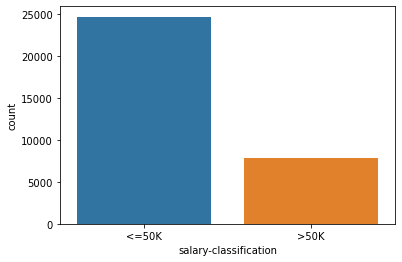

In [98]:
sns.countplot(x = 'salary-classification', data = training)
plt.savefig('na.pdf', format = 'pdf')

## Tratamento do desbalanceamento do 'salary-classification'

In [99]:
import imblearn
import collections as colect

counter = colect.Counter(train_y)
counter

Counter({0: 24720, 1: 7841})

In [100]:
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# transform the dataset
oversample = RandomOverSampler(sampling_strategy = 0.4)
undersample = RandomUnderSampler(sampling_strategy = 0.4)
smote = SMOTE(sampling_strategy = 0.4)
adasyn = ADASYN(sampling_strategy = 0.4)

over_train_x, over_train_y = oversample.fit_resample(train_x, train_y)
under_train_x, under_train_y = undersample.fit_resample(train_x, train_y)
smote_train_x, smote_train_y = smote.fit_resample(train_x, train_y)
adasyn_train_x, adasyn_train_y = adasyn.fit_resample(train_x, train_y)

In [101]:
counter1 = colect.Counter(over_train_y)
counter2 = colect.Counter(under_train_y)
counter3 = colect.Counter(smote_train_y)
counter4 = colect.Counter(adasyn_train_y)

print('Random over sampling: ', counter1)
print('Random under sampling: ', counter2)
print('SMOTE: ', counter3)
print('ADASYN: ', counter4)

Random over sampling:  Counter({0: 24720, 1: 9888})
Random under sampling:  Counter({0: 19602, 1: 7841})
SMOTE:  Counter({0: 24720, 1: 9888})
ADASYN:  Counter({0: 24720, 1: 9137})


### Adaboost com oversampling

* Random over sampling

In [102]:
tuning.fit(over_train_x, over_train_y)

print(tuning.best_params_)
print(tuning.best_score_)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


[Parallel(n_jobs=14)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=14)]: Done  22 tasks      | elapsed:   16.2s
[Parallel(n_jobs=14)]: Done 172 tasks      | elapsed:  3.8min
[Parallel(n_jobs=14)]: Done 422 tasks      | elapsed:  8.7min
[Parallel(n_jobs=14)]: Done 772 tasks      | elapsed: 15.9min
[Parallel(n_jobs=14)]: Done 1222 tasks      | elapsed: 24.2min
[Parallel(n_jobs=14)]: Done 1440 out of 1440 | elapsed: 28.2min finished


{'learning_rate': 1.6600000000000001, 'n_estimators': 1000}
0.8598013955671202


In [109]:
abc = AdaBoostClassifier(n_estimators = 1000, learning_rate = 1.6600000000000001, random_state = 42)

# Train Adaboost Classifer
model = abc.fit(over_train_x, over_train_y)

#Predict the response for test dataset
predictions = model.predict(test_x)

In [110]:
print(confusion_matrix(test_y, predictions))
print('\n')
print(classification_report(test_y, predictions, digits = 3))

[[11518   917]
 [ 1224  2622]]


              precision    recall  f1-score   support

           0      0.904     0.926     0.915     12435
           1      0.741     0.682     0.710      3846

    accuracy                          0.868     16281
   macro avg      0.822     0.804     0.813     16281
weighted avg      0.865     0.868     0.867     16281



* SMOTE

In [111]:
tuning.fit(smote_train_x, smote_train_y)

print(tuning.best_params_)
print(tuning.best_score_)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


[Parallel(n_jobs=14)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=14)]: Done  22 tasks      | elapsed:   19.4s
[Parallel(n_jobs=14)]: Done 172 tasks      | elapsed:  4.0min
[Parallel(n_jobs=14)]: Done 422 tasks      | elapsed:  9.0min
[Parallel(n_jobs=14)]: Done 772 tasks      | elapsed: 15.6min
[Parallel(n_jobs=14)]: Done 1222 tasks      | elapsed: 23.6min
[Parallel(n_jobs=14)]: Done 1440 out of 1440 | elapsed: 27.6min finished


{'learning_rate': 1.5, 'n_estimators': 600}
0.8578076268511389


In [114]:
abc = AdaBoostClassifier(n_estimators = 600, learning_rate = 1.5, random_state = 42)

# Train Adaboost Classifer
model = abc.fit(smote_train_x, smote_train_y)

#Predict the response for test dataset
predictions = model.predict(test_x)

In [115]:
print(confusion_matrix(test_y, predictions))
print('\n')
print(classification_report(test_y, predictions, digits = 3))

[[11519   916]
 [ 1218  2628]]


              precision    recall  f1-score   support

           0      0.904     0.926     0.915     12435
           1      0.742     0.683     0.711      3846

    accuracy                          0.869     16281
   macro avg      0.823     0.805     0.813     16281
weighted avg      0.866     0.869     0.867     16281



* ADASYN

In [118]:
tuning.fit(adasyn_train_x, adasyn_train_y)

print(tuning.best_params_)
print(tuning.best_score_)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


[Parallel(n_jobs=14)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=14)]: Done  22 tasks      | elapsed:   17.0s
[Parallel(n_jobs=14)]: Done 172 tasks      | elapsed:  3.3min
[Parallel(n_jobs=14)]: Done 422 tasks      | elapsed:  7.3min
[Parallel(n_jobs=14)]: Done 772 tasks      | elapsed: 13.2min
[Parallel(n_jobs=14)]: Done 1222 tasks      | elapsed: 20.7min
[Parallel(n_jobs=14)]: Done 1440 out of 1440 | elapsed: 24.6min finished


{'learning_rate': 1.6400000000000001, 'n_estimators': 900}
0.8453200379353337


In [119]:
abc = AdaBoostClassifier(n_estimators = 900, learning_rate = 1.6400000000000001)

# Train Adaboost Classifer
model = abc.fit(adasyn_train_x, adasyn_train_y)

#Predict the response for test dataset
predictions = model.predict(test_x)

In [120]:
print(confusion_matrix(test_y, predictions))
print('\n')
print(classification_report(test_y, predictions, digits = 3))

[[11520   915]
 [ 1223  2623]]


              precision    recall  f1-score   support

           0      0.904     0.926     0.915     12435
           1      0.741     0.682     0.710      3846

    accuracy                          0.869     16281
   macro avg      0.823     0.804     0.813     16281
weighted avg      0.866     0.869     0.867     16281



### Adaboost com Undersampling

* RandomUnderSampler

In [121]:
tuning.fit(under_train_x, under_train_y)

print(tuning.best_params_)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


[Parallel(n_jobs=14)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=14)]: Done  22 tasks      | elapsed:    9.6s
[Parallel(n_jobs=14)]: Done 172 tasks      | elapsed:  2.0min
[Parallel(n_jobs=14)]: Done 422 tasks      | elapsed:  5.0min
[Parallel(n_jobs=14)]: Done 772 tasks      | elapsed:  9.1min
[Parallel(n_jobs=14)]: Done 1222 tasks      | elapsed: 14.3min
[Parallel(n_jobs=14)]: Done 1440 out of 1440 | elapsed: 16.9min finished


{'learning_rate': 1.56, 'n_estimators': 800}


In [126]:
abc = AdaBoostClassifier(n_estimators = 800, learning_rate = 1.56)

# Train Adaboost Classifer
model = abc.fit(under_train_x, under_train_y)

#Predict the response for test dataset
predictions = model.predict(test_x)

In [127]:
print(confusion_matrix(test_y, predictions))
print('\n')
print(classification_report(test_y, predictions, digits = 3))

[[11551   884]
 [ 1238  2608]]


              precision    recall  f1-score   support

           0      0.903     0.929     0.916     12435
           1      0.747     0.678     0.711      3846

    accuracy                          0.870     16281
   macro avg      0.825     0.804     0.813     16281
weighted avg      0.866     0.870     0.867     16281



### Feature Importance

#### Após a execução dos modelos preditivos, foi efetuada uma análise da importância das features para um dos nossos melhores modelos (AdaBoost com Decision Tree)

In [128]:
train_x

,ageBinned,workclass,education-num,marital-status,occupation,relationship,sex,hours-per-week,capital
0,2,6,13,4,0,1,1,40,2174
1,3,5,13,2,3,0,1,13,0
2,2,3,9,0,5,1,1,40,0
3,3,3,7,2,5,0,1,40,0
4,0,3,13,2,9,5,0,40,0
...,...,...,...,...,...,...,...,...,...
32556,0,3,12,2,12,5,0,38,0
32557,2,3,9,2,6,0,1,40,0
32558,3,3,9,6,0,4,0,40,0
32559,0,3,9,4,0,3,1,20,0


Feature: 0, Score: 0.01125
Feature: 1, Score: 0.01750
Feature: 2, Score: 0.04000
Feature: 3, Score: 0.03750
Feature: 4, Score: 0.04250
Feature: 5, Score: 0.04875
Feature: 6, Score: 0.00375
Feature: 7, Score: 0.10375
Feature: 8, Score: 0.69500


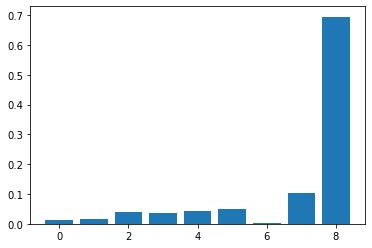

In [129]:
importance = abc.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i, v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Feature: 0, Score: 0.05510
Feature: 1, Score: 0.01095
Feature: 2, Score: 0.19764
Feature: 3, Score: 0.13250
Feature: 4, Score: 0.02542
Feature: 5, Score: 0.23563
Feature: 6, Score: 0.00984
Feature: 7, Score: 0.05219
Feature: 8, Score: 0.28073


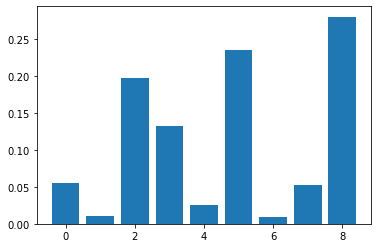

In [130]:
importance = rf.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i, v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

* Ficamos, assim, com um modelo que possui apenas 9 features, uma diminuição acentuada relativamente às 14 iniciais

# Avaliação dos Modelos

#### Temos um dataset de teste desbalanceado, pelo que a accuracy dos modelos desenvolvidos, apesar de alta, não transmite que o modelo é bom. 
* Um modelo que prevesse sempre '<=50K' teria 76.38% de accuracy

#### O melhor modelo a nível de accuracy é o AdaBoost de Decision Tree, com uma accuracy de 87% 

#### Este modelo com e sem o undersampling/oversampling possui a mesma accuracy, contudo melhora significativamente com o melhor tratamento de imbalanced data (SMOTE)
#### Assim, este modelo revela-se o melhor com a utilização de SMOTE, ficando com uma accuracy de 87% e um F1-Score de 72% para a classe menos representada (precision de 74% e recall de 69%)

* Deste modo, a escolher um modelo, indicavamos o uso do AdaBoost de Decision Tree após a aplicação do SMOTE